In [1]:
import random as rnd
import prettytable
import pandas as pd
import io

from zipfile import ZipFile

In [64]:
timetable_zip = ZipFile('./data/student_timetable.zip', 'r')
timetable_data = timetable_zip.read('student_timetable.csv')
timetable_bytes = io.BytesIO(timetable_data)
timetable_bytes.seek(0)
df = pd.read_csv(timetable_bytes, sep=';', on_bad_lines='warn')
df = df[df["room_address"] != 'Missing info']
df['room_address'] = df['room_address'].apply(str.strip)

In [43]:
# not all students join both semesters in 2019
df.groupby("student_id")["year_semester"].nunique().value_counts()

2    24703
1    11518
Name: year_semester, dtype: int64

<AxesSubplot: >

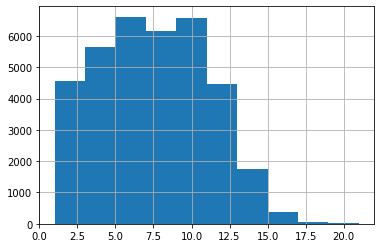

In [44]:
# a student can join many courses
df.groupby("student_id")["course_id"].nunique().hist()

In [45]:
# some different courses have the same course_id
# but, one semester, one course_id only has one course name
df.groupby(["year_semester","course_id"])["course"].nunique().value_counts()

1    4456
Name: course, dtype: int64

In [66]:
df.groupby(["year_semester","course_id","weekday","room_address"]).agg(
    start_time_count=("start_time","nunique"),
    end_time_count=("end_time","nunique")
).query("start_time_count > 1")

start_time_count  \
year_semester course_id weekday  room_address                                    
20191         100455    Thursday SALA PAT AT 021                             2   
              100625    Tuesday  SALA PJC BT 093                             2   
              100757    Thursday HOSPITAL VETERINÁRIO                        2   
              100765    Friday   HOSPITAL VETERINÁRIO                        2   
              100838    Tuesday  SALA ICC AT - 079/8                         2   
...                                                                        ...   
20192         320773    Monday   SALA DE AULA ENM DT 77/15                   2   
              324710    Tuesday  SALA ICC AT 170                             2   
              364347    Monday   SALA ENM  DT 16/15                          2   
              364479    Friday   SALA DE AULA - ENM GT 11/20                 2   
              364754    Friday   SALA ENM  DT 43/15                          2   

                                                              end_time_count  
year_semester course_id weekday  room_address                                 
20191         100455    Thursday SALA PAT AT 021                           2  
              100625    Tuesday  SALA PJC BT 093                           2  
              100757    Thursday HOSPITAL VETERINÁRIO                      2  
              100765    Friday   HOSPITAL VETERINÁRIO                      2  
              100838    Tuesday  SALA ICC AT - 079/8                       2  
...                                                                      ...  
20192         320773    Monday   SALA DE AULA ENM DT 77/15                 2  
              324710    Tuesday  SALA ICC AT 170                           2  
              364347    Monday   SALA ENM  DT 16/15                        2  
              364479    Friday   SALA DE AULA - ENM GT 11/20               2  
              364754    Friday   SALA ENM  DT 43/15                        2  

[1381 rows x 2 columns]

In [69]:
df[(df["course_id"]==100455)&(df["year_semester"]==20191)&(df["weekday"]=="Thursday")&(df["room_address"]=="SALA PAT AT 021")]

,student_id,year_semester,course_id,course,weekday,start_time,end_time,room_address
27580,207286,20191,100455,3 Social Security - Social Care,Thursday,19:00,20:40,SALA PAT AT 021
27587,207286,20191,100455,3 Social Security - Social Care,Thursday,20:50,22:30,SALA PAT AT 021
31408,211274,20191,100455,3 Social Security - Social Care,Thursday,19:00,20:40,SALA PAT AT 021
31411,211274,20191,100455,3 Social Security - Social Care,Thursday,20:50,22:30,SALA PAT AT 021
33117,212736,20191,100455,3 Social Security - Social Care,Thursday,19:00,20:40,SALA PAT AT 021
...,...,...,...,...,...,...,...,...
379930,279763,20191,100455,3 Social Security - Social Care,Thursday,19:00,20:40,SALA PAT AT 021
392900,281249,20191,100455,3 Social Security - Social Care,Thursday,20:50,22:30,SALA PAT AT 021
392902,281249,20191,100455,3 Social Security - Social Care,Thursday,19:00,20:40,SALA PAT AT 021
521364,292981,20191,100455,3 Social Security - Social Care,Thursday,19:00,20:40,SALA PAT AT 021


In [ ]:
POPULATION_SIZE = 9
NUMB_OF_ELITE_SCHEDULES = 1
TOURNAMENT_SELECTION_SIZE = 3
MUTATION_RATE = 0.1

class Data:
    """"""
    SHIFTS = df[["Time Windows","Workers Required"]].dropna().astype(int, errors="ignore").values.tolist()
    MEETING_TIMES = [
        ['MT1','MWF 09:00 - 10:00'],
        ['MT2','MWF 10:00 - 11:00'],
        ['MT3','TTH 09:00 - 10:30'],
        ['MT4','TTH 10:30 - 12:00'],
    ]
    INSTRUCTORS = [
        ['I1', 'Dr James Web'],
        ['I2', 'Mr. Mike Brown'],
        ['I3', 'Dr Steve Day'],
        ['I4', 'Mrs Jane Doe']
    ]
    def __init__(self):
        self._rooms = []; self._meetingTimes = []; self._instructors = []
        for i in range(0, len(self.ROOMS)):
            self._rooms.append(Room(self.ROOMS[i][0], self.ROOMS[i][1]))
        for i in range(0, len(self.MEETING_TIMES)):
            self._meetingTimes.append(MeetingTime(self.MEETING_TIMES[i][0], self.MEETING_TIMES[i][1]))
        for i in range(0, len(self.INSTRUCTORS)):
            self._instructors.append(Instructor(self.INSTRUCTORS[i][0], self.INSTRUCTORS[i][1]))
        course1 = Course("C1", "325K", [self._instructors[0], self._instructors[1]], 25)
        course2 = Course("C2", "319K", [self._instructors[0], self._instructors[1], self._instructors[2]], 35)
        course3 = Course("C3", "462K", [self._instructors[0], self._instructors[1]], 25)
        course4 = Course("C4", "464K", [self._instructors[2], self._instructors[3]], 30)
        course5 = Course("C5", "360C", [self._instructors[3]], 35)
        course6 = Course("C6", "303K", [self._instructors[0], self._instructors[2]], 45)
        course7 = Course("C7", "303L", [self._instructors[1], self._instructors[3]], 45)
        self._courses = [course1, course2, course3, course4, course5, course6, course7]
        dept1 = Department("MATH", [course1, course3])
        dept2 = Department("EE", [course2, course4, course5])
        dept3 = Department("PHY", [course6, course7])
        self._depts = [dept1, dept2, dept3]
        self._numberOfClasses = 0
        for i in range(0, len(self._depts)):
            self._numberOfClasses += len(self._depts[i].get_courses())
    def get_rooms(self): return self._rooms
    def get_instructors(self): return self._instructors
    def get_courses(self): return self._courses
    def get_depts(self): return self._depts
    def get_meetingTimes(self): return self._meetingTimes
    def get_numberOfClasses(self): return self._numberOfClasses
        
class Schedule:
    """"""
    def __init__(self) -> None:
        self._data = data
        self._classes = []
        self._numbOfConflicts = 0
        self._fitness = -1
        self._classNumb = 0 
        self._isFitnessChanged = True
    def get_classes(self):
        self._isFitnessChanged = True
        return self._classes
    def get_numbOfConflicts(self): return self._numbOfConflicts
    def get_fitness(self):
        if self._isFitnessChanged == True:
            self._fitness = self.calculate_fitness()
            self._isFitnessChanged = False
        return self._fitness

    def initialize(self):
        depts = self._data.get_depts()
        for i in range(0, len(depts)):
            courses = depts[i].get_courses()
            for j in range(len(courses)):
                newClass = Class(self._classNumb, depts[i], courses[j])
                self._classNumb += 1
                newClass.set_meetingTime(data.get_meetingTimes()[rnd.randrange(0, len(data.get_meetingTimes()))])
                newClass.set_room(data.get_rooms()[rnd.randrange(0, len(data.get_rooms()))])
                newClass.set_instructor(courses[j].get_instructors()[rnd.randrange(0, len(courses[j].get_instructors()))])
                self._classes.append(newClass)
        return self
    def calculate_fitness(self):
        self._numbOfConflicts = 0
        classes = self.get_classes()
        for i in range(0, len(classes)):
            if classes[i].get_room().get_seatingCapacity() < classes[i].get_course().get_maxNumOfStudents(): 
                self._numbOfConflicts += 1
            for j in range(0, len(classes)):
                if j >= i:
                    if classes[i].get_meetingTime() == classes[j].get_meetingTime() and classes[i].get_id() != classes[j].get_id():
                        if classes[i].get_room() == classes[j].get_room(): self._numbOfConflicts += 1
                        if classes[i].get_instructor() == classes[j].get_instructor(): self._numbOfConflicts += 1
        return 1 / ((1.0*self._numbOfConflicts + 1))
    def __str__(self):
        returnValue = ""
        for i in range(0, len(self._classes)-1):
            returnValue += str(self._classes[i]) + ', '
        returnValue += str(self._classes[len(self._classes)-1])
        return returnValue

class Population:
    """"""
    def __init__(self, size):
        self._size = size
        self._data = data
        self._schedules = []
        for _ in range(0, size):
            self._schedules.append(Schedule().initialize())
    def get_schedules(self): return self._schedules

class GeneticAlgorithm:
    """"""
    def evolve(self, population): return self._mutate_population(self._crossover_population(population))
    def _crossover_population(self, pop):
        crossover_pop = Population(0)
        for i in range(NUMB_OF_ELITE_SCHEDULES):
            crossover_pop.get_schedules().append(pop.get_schedules()[i])
        i = NUMB_OF_ELITE_SCHEDULES
        while i < POPULATION_SIZE:
            schedule1 = self._select_tournament_population(pop).get_schedules()[0]
            schedule2 = self._select_tournament_population(pop).get_schedules()[0]
            crossover_pop.get_schedules().append(self._crossover_schedule(schedule1, schedule2))
            i += 1
        return crossover_pop
    def _mutate_population(self, population):
        for i in range(NUMB_OF_ELITE_SCHEDULES, POPULATION_SIZE):
            self._mutate_schedule(population.get_schedules()[i])
        return population
    def _crossover_schedule(self, schedule1, schedule2):
        crossoverSchedule = Schedule().initialize()
        for i in range(0, len(crossoverSchedule.get_classes())):
            if rnd.random() > 0.5: crossoverSchedule.get_classes()[i] = schedule1.get_classes()[i]
            else: crossoverSchedule.get_classes()[i] = schedule2.get_classes()[i]
        return crossoverSchedule
    def _mutate_schedule(self, mutateSchedule):
        schedule = Schedule().initialize()
        for i in range(0, len(mutateSchedule.get_classes())):
            if MUTATION_RATE > rnd.random(): mutateSchedule.get_classes()[i] = schedule.get_classes()[i]
        return mutateSchedule
    def _select_tournament_population(self, pop):
        tournament_pop = Population(0)
        i = 0
        while i < TOURNAMENT_SELECTION_SIZE:
            tournament_pop.get_schedules().append(pop.get_schedules()[rnd.randrange(0, POPULATION_SIZE)])
            i += 1
        tournament_pop.get_schedules().sort(key=lambda x: x.get_fitness(), reverse=True)
        return tournament_pop

class Course:
    """"""
    def __init__(self, number, name, instructors, maxNumOfStudents):
        self._number = number
        self._name = name
        self._instructors = instructors
        self._maxNumOfStudents = maxNumOfStudents
    
    def get_number(self): return self._number
    def get_name(self): return self._name
    def get_instructors(self): return self._instructors
    def get_maxNumOfStudents(self): return self._maxNumOfStudents
    def __str__(self): return self._name

class Instructor:
    """"""
    def __init__(self, id, name):
        self._id = id
        self._name = name
    def get_id(self): return self._id 
    def get_name(self): return self._name
    def __str__(self): return self._name

class Room:
    """"""
    def __init__(self, number, seatingCapacity):
        self._number = number
        self._seatingCapacity = seatingCapacity
    def get_number(self): return self._number
    def get_seatingCapacity(self): return self._seatingCapacity
    
class MeetingTime:
    """"""
    def __init__(self, id, time):
        self._id = id
        self._time = time
    def get_id(self): return self._id
    def get_time(self): return self._time

class Department:
    """"""
    def __init__(self, name, courses):
        self._name = name 
        self._courses = courses
    def get_name(self): return self._name
    def get_courses(self): return self._courses

class Class:
    """"""
    def __init__(self, id, dept, course):
        self._id = id
        self._dept = dept
        self._course = course
        self._instructor = None
        self._meetingTime = None
        self._room = None
    def get_id(self): return self._id
    def get_dept(self): return self._dept
    def get_course(self): return self._course
    def get_instructor(self): return self._instructor
    def get_meetingTime(self): return self._meetingTime
    def get_room(self): return self._room
    def set_instructor(self, instructor): self._instructor = instructor
    def set_meetingTime(self, meetingTime): self._meetingTime = meetingTime
    def set_room(self, room): self._room = room
    def __str__(self):
        return str(self._dept.get_name()) + ',' + str(self._course.get_number()) + ',' + \
               str(self._room.get_number()) + ',' + str(self._instructor.get_id()) + ',' + str(self._meetingTime.get_id()) 

class DisplayMgr:
    def print_available_data(self):
        print('> All Available Data')
        self.print_dept()
        self.print_course()
        self.print_room()
        self.print_instructor()
        self.print_meeting_times()
    def print_dept(self):
        depts = data.get_depts()
        availableDeptsTable = prettytable.PrettyTable(['dept', 'courses'])
        for i in range(0, len(depts)):
            courses = depts.__getitem__(i).get_courses()
            tempStr = "["
            for j in range(0, len(courses) - 1):
                tempStr += courses[j].__str__() + ', '
            tempStr += courses[len(courses) - 1].__str__() + "]"
            availableDeptsTable.add_row([depts.__getitem__(i).get_name(), tempStr])
        print(availableDeptsTable)
    def print_course(self):
        availableCoursesTable = prettytable.PrettyTable(['id','course #', 'max # of students', 'Instructors'])
        courses = data.get_courses()
        for i in range(0, len(courses)):
            instructors = courses[i].get_instructors()
            tempStr = ""
            for j in range(0, len(instructors) - 1):
                tempStr += instructors[j].__str__() + ', '
            tempStr += instructors[len(instructors) - 1].__str__()
            availableCoursesTable.add_row([
                courses[i].get_number(), courses[i].get_name(), str(courses[i].get_maxNumOfStudents()), tempStr
            ])
        print(availableCoursesTable)
    def print_instructor(self):
        availableInstructorsTable = prettytable.PrettyTable(['id', 'instructor'])
        instructors = data.get_instructors()
        for i in range(0, len(instructors)):
            availableInstructorsTable.add_row([instructors[i].get_id(), instructors[i].get_name()])
        print(availableInstructorsTable)
    def print_room(self):
        availableRoomsTable = prettytable.PrettyTable(['room #', 'max seating capacity'])
        rooms = data.get_rooms()
        for i in range(0, len(rooms)):
            availableRoomsTable.add_row([str(rooms[i].get_number()), str(rooms[i].get_seatingCapacity())])
        print(availableRoomsTable)
    def print_meeting_times(self):
        availableMeetingTimeTable = prettytable.PrettyTable(['id', 'Meeting Time'])
        meetingTimes = data.get_meetingTimes()
        for i in range(0, len(meetingTimes)):
            availableMeetingTimeTable.add_row([meetingTimes[i].get_id(), meetingTimes[i].get_time()])
        print(availableMeetingTimeTable)
    def print_generation(self, population):
        table1 = prettytable.PrettyTable(['schedule #', 'fitness', '# of conflicts', 'classes [dept,class,room,instructor,meetingtime]'])
        schedules = population.get_schedules()
        for i in range(0, len(schedules)):
            table1.add_row([str(i), round(schedules[i].get_fitness(), 3), schedules[i].get_numbOfConflicts(), schedules[i]])
        print(table1)
    def print_schedule_as_table(self, schedule):
        classes = schedule.get_classes()
        table = prettytable.PrettyTable(['Class #', 'Dept', 'Course (number, max # of students)', 'Room (Capacity)', 'Instructor', 'Meeting Time'])
        for i in range(0, len(classes)):
            table.add_row([
                str(i),classes[i].get_dept().get_name(),
                classes[i].get_course().get_name() + ' (' + classes[i].get_course().get_number() + ', ' + str(classes[i].get_course().get_maxNumOfStudents()) + ')',
                classes[i].get_room().get_number() + ' (' + str(classes[i].get_room().get_seatingCapacity()) + ')',
                classes[i].get_instructor().get_name() + ' (' + str(classes[i].get_instructor().get_id()) + ')',
                classes[i].get_meetingTime().get_time() + ' (' + str(classes[i].get_meetingTime().get_id()) +')'
            ])
        print(table)

data = Data()
displayMgr = DisplayMgr()
displayMgr.print_available_data()
generationNumber = 0
print('\n> Generation # ' + str(generationNumber))
population = Population(POPULATION_SIZE)
population.get_schedules().sort(key=lambda x: x.get_fitness(), reverse=True)
displayMgr.print_generation(population)
displayMgr.print_schedule_as_table(population.get_schedules()[0])
geneticAlgorithm = GeneticAlgorithm()
while population.get_schedules()[0].get_fitness() != 1.0:
    generationNumber += 1
    print("\n> Generation # " + str(generationNumber))
    population = geneticAlgorithm.evolve(population)
    population.get_schedules().sort(key=lambda x: x.get_fitness(), reverse=True)
    displayMgr.print_generation(population)
    displayMgr.print_schedule_as_table(population.get_schedules()[0])
print('\n\n')

In [26]:
POPULATION_SIZE = 9
NUMB_OF_ELITE_SCHEDULES = 1
TOURNAMENT_SELECTION_SIZE = 3
MUTATION_RATE = 0.1

class Data:
    """"""
    ROOMS = [['R1',25],['R2',45],['R3',35]]
    MEETING_TIMES = [
        ['MT1','MWF 09:00 - 10:00'],
        ['MT2','MWF 10:00 - 11:00'],
        ['MT3','TTH 09:00 - 10:30'],
        ['MT4','TTH 10:30 - 12:00'],
    ]
    INSTRUCTORS = [
        ['I1', 'Dr James Web'],
        ['I2', 'Mr. Mike Brown'],
        ['I3', 'Dr Steve Day'],
        ['I4', 'Mrs Jane Doe']
    ]
    def __init__(self):
        self._rooms = []; self._meetingTimes = []; self._instructors = []
        for i in range(0, len(self.ROOMS)):
            self._rooms.append(Room(self.ROOMS[i][0], self.ROOMS[i][1]))
        for i in range(0, len(self.MEETING_TIMES)):
            self._meetingTimes.append(MeetingTime(self.MEETING_TIMES[i][0], self.MEETING_TIMES[i][1]))
        for i in range(0, len(self.INSTRUCTORS)):
            self._instructors.append(Instructor(self.INSTRUCTORS[i][0], self.INSTRUCTORS[i][1]))
        course1 = Course("C1", "325K", [self._instructors[0], self._instructors[1]], 25)
        course2 = Course("C2", "319K", [self._instructors[0], self._instructors[1], self._instructors[2]], 35)
        course3 = Course("C3", "462K", [self._instructors[0], self._instructors[1]], 25)
        course4 = Course("C4", "464K", [self._instructors[2], self._instructors[3]], 30)
        course5 = Course("C5", "360C", [self._instructors[3]], 35)
        course6 = Course("C6", "303K", [self._instructors[0], self._instructors[2]], 45)
        course7 = Course("C7", "303L", [self._instructors[1], self._instructors[3]], 45)
        self._courses = [course1, course2, course3, course4, course5, course6, course7]
        dept1 = Department("MATH", [course1, course3])
        dept2 = Department("EE", [course2, course4, course5])
        dept3 = Department("PHY", [course6, course7])
        self._depts = [dept1, dept2, dept3]
        self._numberOfClasses = 0
        for i in range(0, len(self._depts)):
            self._numberOfClasses += len(self._depts[i].get_courses())
    def get_rooms(self): return self._rooms
    def get_instructors(self): return self._instructors
    def get_courses(self): return self._courses
    def get_depts(self): return self._depts
    def get_meetingTimes(self): return self._meetingTimes
    def get_numberOfClasses(self): return self._numberOfClasses
        
class Schedule:
    """"""
    def __init__(self) -> None:
        self._data = data
        self._classes = []
        self._numbOfConflicts = 0
        self._fitness = -1
        self._classNumb = 0 
        self._isFitnessChanged = True
    def get_classes(self):
        self._isFitnessChanged = True
        return self._classes
    def get_numbOfConflicts(self): return self._numbOfConflicts
    def get_fitness(self):
        if self._isFitnessChanged == True:
            self._fitness = self.calculate_fitness()
            self._isFitnessChanged = False
        return self._fitness

    def initialize(self):
        depts = self._data.get_depts()
        for i in range(0, len(depts)):
            courses = depts[i].get_courses()
            for j in range(len(courses)):
                newClass = Class(self._classNumb, depts[i], courses[j])
                self._classNumb += 1
                newClass.set_meetingTime(data.get_meetingTimes()[rnd.randrange(0, len(data.get_meetingTimes()))])
                newClass.set_room(data.get_rooms()[rnd.randrange(0, len(data.get_rooms()))])
                newClass.set_instructor(courses[j].get_instructors()[rnd.randrange(0, len(courses[j].get_instructors()))])
                self._classes.append(newClass)
        return self
    def calculate_fitness(self):
        self._numbOfConflicts = 0
        classes = self.get_classes()
        for i in range(0, len(classes)):
            if classes[i].get_room().get_seatingCapacity() < classes[i].get_course().get_maxNumOfStudents(): 
                self._numbOfConflicts += 1
            for j in range(0, len(classes)):
                if j >= i:
                    if classes[i].get_meetingTime() == classes[j].get_meetingTime() and classes[i].get_id() != classes[j].get_id():
                        if classes[i].get_room() == classes[j].get_room(): self._numbOfConflicts += 1
                        if classes[i].get_instructor() == classes[j].get_instructor(): self._numbOfConflicts += 1
        return 1 / ((1.0*self._numbOfConflicts + 1))
    def __str__(self):
        returnValue = ""
        for i in range(0, len(self._classes)-1):
            returnValue += str(self._classes[i]) + ', '
        returnValue += str(self._classes[len(self._classes)-1])
        return returnValue

class Population:
    """"""
    def __init__(self, size):
        self._size = size
        self._data = data
        self._schedules = []
        for _ in range(0, size):
            self._schedules.append(Schedule().initialize())
    def get_schedules(self): return self._schedules

class GeneticAlgorithm:
    """"""
    def evolve(self, population): return self._mutate_population(self._crossover_population(population))
    def _crossover_population(self, pop):
        crossover_pop = Population(0)
        for i in range(NUMB_OF_ELITE_SCHEDULES):
            crossover_pop.get_schedules().append(pop.get_schedules()[i])
        i = NUMB_OF_ELITE_SCHEDULES
        while i < POPULATION_SIZE:
            schedule1 = self._select_tournament_population(pop).get_schedules()[0]
            schedule2 = self._select_tournament_population(pop).get_schedules()[0]
            crossover_pop.get_schedules().append(self._crossover_schedule(schedule1, schedule2))
            i += 1
        return crossover_pop
    def _mutate_population(self, population):
        for i in range(NUMB_OF_ELITE_SCHEDULES, POPULATION_SIZE):
            self._mutate_schedule(population.get_schedules()[i])
        return population
    def _crossover_schedule(self, schedule1, schedule2):
        crossoverSchedule = Schedule().initialize()
        for i in range(0, len(crossoverSchedule.get_classes())):
            if rnd.random() > 0.5: crossoverSchedule.get_classes()[i] = schedule1.get_classes()[i]
            else: crossoverSchedule.get_classes()[i] = schedule2.get_classes()[i]
        return crossoverSchedule
    def _mutate_schedule(self, mutateSchedule):
        schedule = Schedule().initialize()
        for i in range(0, len(mutateSchedule.get_classes())):
            if MUTATION_RATE > rnd.random(): mutateSchedule.get_classes()[i] = schedule.get_classes()[i]
        return mutateSchedule
    def _select_tournament_population(self, pop):
        tournament_pop = Population(0)
        i = 0
        while i < TOURNAMENT_SELECTION_SIZE:
            tournament_pop.get_schedules().append(pop.get_schedules()[rnd.randrange(0, POPULATION_SIZE)])
            i += 1
        tournament_pop.get_schedules().sort(key=lambda x: x.get_fitness(), reverse=True)
        return tournament_pop

class Course:
    """"""
    def __init__(self, number, name, instructors, maxNumOfStudents):
        self._number = number
        self._name = name
        self._instructors = instructors
        self._maxNumOfStudents = maxNumOfStudents
    
    def get_number(self): return self._number
    def get_name(self): return self._name
    def get_instructors(self): return self._instructors
    def get_maxNumOfStudents(self): return self._maxNumOfStudents
    def __str__(self): return self._name

class Instructor:
    """"""
    def __init__(self, id, name):
        self._id = id
        self._name = name
    def get_id(self): return self._id 
    def get_name(self): return self._name
    def __str__(self): return self._name

class Room:
    """"""
    def __init__(self, number, seatingCapacity):
        self._number = number
        self._seatingCapacity = seatingCapacity
    def get_number(self): return self._number
    def get_seatingCapacity(self): return self._seatingCapacity
    
class MeetingTime:
    """"""
    def __init__(self, id, time):
        self._id = id
        self._time = time
    def get_id(self): return self._id
    def get_time(self): return self._time

class Department:
    """"""
    def __init__(self, name, courses):
        self._name = name 
        self._courses = courses
    def get_name(self): return self._name
    def get_courses(self): return self._courses

class Class:
    """"""
    def __init__(self, id, dept, course):
        self._id = id
        self._dept = dept
        self._course = course
        self._instructor = None
        self._meetingTime = None
        self._room = None
    def get_id(self): return self._id
    def get_dept(self): return self._dept
    def get_course(self): return self._course
    def get_instructor(self): return self._instructor
    def get_meetingTime(self): return self._meetingTime
    def get_room(self): return self._room
    def set_instructor(self, instructor): self._instructor = instructor
    def set_meetingTime(self, meetingTime): self._meetingTime = meetingTime
    def set_room(self, room): self._room = room
    def __str__(self):
        return str(self._dept.get_name()) + ',' + str(self._course.get_number()) + ',' + \
               str(self._room.get_number()) + ',' + str(self._instructor.get_id()) + ',' + str(self._meetingTime.get_id()) 

class DisplayMgr:
    def print_available_data(self):
        print('> All Available Data')
        self.print_dept()
        self.print_course()
        self.print_room()
        self.print_instructor()
        self.print_meeting_times()
    def print_dept(self):
        depts = data.get_depts()
        availableDeptsTable = prettytable.PrettyTable(['dept', 'courses'])
        for i in range(0, len(depts)):
            courses = depts.__getitem__(i).get_courses()
            tempStr = "["
            for j in range(0, len(courses) - 1):
                tempStr += courses[j].__str__() + ', '
            tempStr += courses[len(courses) - 1].__str__() + "]"
            availableDeptsTable.add_row([depts.__getitem__(i).get_name(), tempStr])
        print(availableDeptsTable)
    def print_course(self):
        availableCoursesTable = prettytable.PrettyTable(['id','course #', 'max # of students', 'Instructors'])
        courses = data.get_courses()
        for i in range(0, len(courses)):
            instructors = courses[i].get_instructors()
            tempStr = ""
            for j in range(0, len(instructors) - 1):
                tempStr += instructors[j].__str__() + ', '
            tempStr += instructors[len(instructors) - 1].__str__()
            availableCoursesTable.add_row([
                courses[i].get_number(), courses[i].get_name(), str(courses[i].get_maxNumOfStudents()), tempStr
            ])
        print(availableCoursesTable)
    def print_instructor(self):
        availableInstructorsTable = prettytable.PrettyTable(['id', 'instructor'])
        instructors = data.get_instructors()
        for i in range(0, len(instructors)):
            availableInstructorsTable.add_row([instructors[i].get_id(), instructors[i].get_name()])
        print(availableInstructorsTable)
    def print_room(self):
        availableRoomsTable = prettytable.PrettyTable(['room #', 'max seating capacity'])
        rooms = data.get_rooms()
        for i in range(0, len(rooms)):
            availableRoomsTable.add_row([str(rooms[i].get_number()), str(rooms[i].get_seatingCapacity())])
        print(availableRoomsTable)
    def print_meeting_times(self):
        availableMeetingTimeTable = prettytable.PrettyTable(['id', 'Meeting Time'])
        meetingTimes = data.get_meetingTimes()
        for i in range(0, len(meetingTimes)):
            availableMeetingTimeTable.add_row([meetingTimes[i].get_id(), meetingTimes[i].get_time()])
        print(availableMeetingTimeTable)
    def print_generation(self, population):
        table1 = prettytable.PrettyTable(['schedule #', 'fitness', '# of conflicts', 'classes [dept,class,room,instructor,meetingtime]'])
        schedules = population.get_schedules()
        for i in range(0, len(schedules)):
            table1.add_row([str(i), round(schedules[i].get_fitness(), 3), schedules[i].get_numbOfConflicts(), schedules[i]])
        print(table1)
    def print_schedule_as_table(self, schedule):
        classes = schedule.get_classes()
        table = prettytable.PrettyTable(['Class #', 'Dept', 'Course (number, max # of students)', 'Room (Capacity)', 'Instructor', 'Meeting Time'])
        for i in range(0, len(classes)):
            table.add_row([
                str(i),classes[i].get_dept().get_name(),
                classes[i].get_course().get_name() + ' (' + classes[i].get_course().get_number() + ', ' + str(classes[i].get_course().get_maxNumOfStudents()) + ')',
                classes[i].get_room().get_number() + ' (' + str(classes[i].get_room().get_seatingCapacity()) + ')',
                classes[i].get_instructor().get_name() + ' (' + str(classes[i].get_instructor().get_id()) + ')',
                classes[i].get_meetingTime().get_time() + ' (' + str(classes[i].get_meetingTime().get_id()) +')'
            ])
        print(table)

data = Data()
displayMgr = DisplayMgr()
displayMgr.print_available_data()
generationNumber = 0
print('\n> Generation # ' + str(generationNumber))
population = Population(POPULATION_SIZE)
population.get_schedules().sort(key=lambda x: x.get_fitness(), reverse=True)
displayMgr.print_generation(population)
displayMgr.print_schedule_as_table(population.get_schedules()[0])
geneticAlgorithm = GeneticAlgorithm()
while population.get_schedules()[0].get_fitness() != 1.0:
    generationNumber += 1
    print("\n> Generation # " + str(generationNumber))
    population = geneticAlgorithm.evolve(population)
    population.get_schedules().sort(key=lambda x: x.get_fitness(), reverse=True)
    displayMgr.print_generation(population)
    displayMgr.print_schedule_as_table(population.get_schedules()[0])
print('\n\n')

> All Available Data
+------+--------------------+
| dept |      courses       |
+------+--------------------+
| MATH |    [325K, 462K]    |
|  EE  | [319K, 464K, 360C] |
| PHY  |    [303K, 303L]    |
+------+--------------------+
+----+----------+-------------------+--------------------------------------------+
| id | course # | max # of students |                Instructors                 |
+----+----------+-------------------+--------------------------------------------+
| C1 |   325K   |         25        |        Dr James Web, Mr. Mike Brown        |
| C2 |   319K   |         35        | Dr James Web, Mr. Mike Brown, Dr Steve Day |
| C3 |   462K   |         25        |        Dr James Web, Mr. Mike Brown        |
| C4 |   464K   |         30        |         Dr Steve Day, Mrs Jane Doe         |
| C5 |   360C   |         35        |                Mrs Jane Doe                |
| C6 |   303K   |         45        |         Dr James Web, Dr Steve Day         |
| C7 |   303L   |     